<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


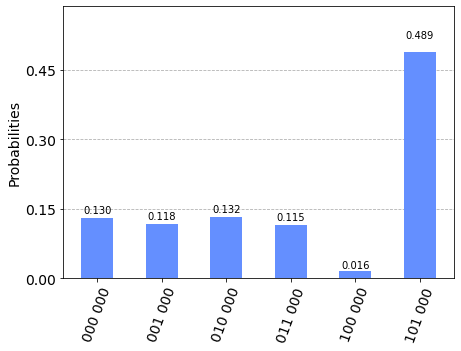

In [3]:
# This code is being generated automatically by the IBM Quantum Circuit Composer widget.
# It changes in every update of the widget, so any modifications done in this cell will be lost.
# State: synchronized
from ibm_quantum_widgets import CircuitComposer
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from numpy import pi
from qiskit import IBMQ, Aer, assemble, transpile
from qiskit.visualization import plot_histogram


qreg_q = QuantumRegister(3, 'q')
creg_c = ClassicalRegister(3, 'c')
creg_meas = ClassicalRegister(3, 'meas')
circuit = QuantumCircuit(qreg_q, creg_c, creg_meas)

#initialisation
circuit.h(qreg_q[0])
circuit.h(qreg_q[1])
circuit.h(qreg_q[2])
#Oracle
circuit.cz(qreg_q[2], qreg_q[0])
circuit.cz(qreg_q[1], qreg_q[0])
circuit.barrier(qreg_q[0], qreg_q[1], qreg_q[2])
# error 
circuit.rx(pi/8, qreg_q[0]) 
# diffuser
circuit.h(qreg_q[2])
circuit.h(qreg_q[0])
circuit.h(qreg_q[1])
circuit.x(qreg_q[2])
circuit.x(qreg_q[0])
circuit.x(qreg_q[1])
circuit.ccx(qreg_q[0], qreg_q[1], qreg_q[2])
circuit.x(qreg_q[0])
circuit.x(qreg_q[1])
circuit.x(qreg_q[2])
circuit.h(qreg_q[2])
circuit.h(qreg_q[0])
circuit.h(qreg_q[1])
circuit.barrier(qreg_q[0], qreg_q[1], qreg_q[2])
#measurement
circuit.measure(qreg_q[0], creg_meas[0])
circuit.measure(qreg_q[1], creg_meas[1])
circuit.measure(qreg_q[2], creg_meas[2])
# drawing the circuit
editor = CircuitComposer(circuit=circuit)
editor
# simulation
aer_sim = Aer.get_backend('aer_simulator')
transpiled_grover_circuit = transpile(circuit, aer_sim)
qobj = assemble(transpiled_grover_circuit)
results = aer_sim.run(qobj).result()
counts = results.get_counts()
plot_histogram(counts)